## Generating the sudo random numbers:

For generating the sudorandom numbers we will use the _Linear Congunate_ or  _Power Resedue_ algorithem.


For a starting point random number (called `seed`) This will generate a sequence of random numbers. They are corelated but they are completely random in order.


The Algorithm goes something like this. We get the next number in the sequence by 

$$ r_{i+1} = rem \left(\frac{ar_i + c}{M}\right) $$


Here $M$, $a$ and $c$ are constants and function $rem$ means reminder of the division.

In [1]:
#constants
a = 57
c = 0
M = 1e40

def random(seed, n): #first number and total number you want
    r = seed
    rs = [r]
    for i in range(n):
        r = (a*r+c)%M
        rs.append(r)
    return rs
a = random(10,400)      

In [2]:
import matplotlib.pyplot as plt

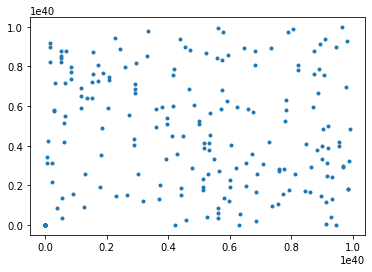

In [3]:
x , y = [], []
for i in range(len(a)//2):
    x.append(a[2*i-1])
    y.append(a[2*i])
plt.plot(x,y,'.')

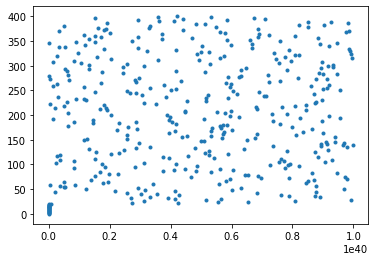

In [4]:
plt.plot(a,range(len(a)),'.')

## A simple 2-D random walk

In [46]:
import random
from math import sqrt
import math
import matplotlib.pyplot as plt

In [6]:
x , y = 0,0 #starting fron origint

R_rms_list = []

rs = list()
N = 10000 #number of stepes

for i in range(int(sqrt(N))):
    xs = []
    ys = []
    for i in range(N):
        dx = random.uniform(-1,1)
        dy = random.uniform(-1,1)

        l = sqrt(dx**2+dy**2)
        dx = dx/l
        dy = dy/l

        x += dx
        y += dy

        xs.append(x)
        ys.append(y)
    
    r = x**2+y**2
    rs.append(r)
    
    R_rms = sqrt(sum(rs))
    R_rms_list.append(R_rms)

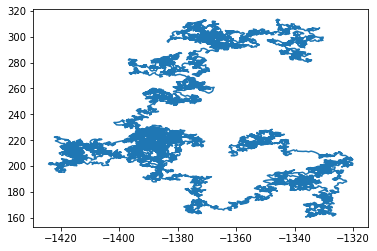

In [7]:
plt.plot(xs,ys)

In [8]:
R_rms

7666.446373452179

In [9]:
ns = [sqrt(n) for n in range(int(sqrt(N)))]
len(ns)

100

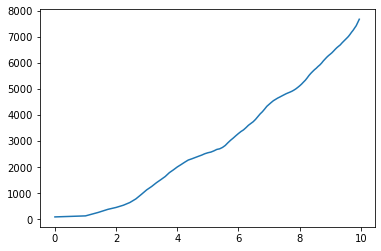

In [10]:
plt.plot(ns,R_rms_list)

## Self avoiding random walk:

In [11]:
dirns = [(-1,0),(0,1),(1,0),(0,-1)]
visited = []
x,y =0,0
steps = 10000

xs = []
ys = []

for step in range(steps):
    dx,dy = random.choice(dirns)
    if (x+dx,y+dy) not in visited:
        x += dx
        y += dy
        visited.append((x,y))
        xs.append(x)
        ys.append(y)


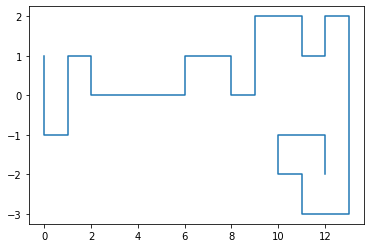

In [12]:
plt.plot(xs,ys)

# Radioactive Decay model using Monte-Carlo Simlulation

Radioactive decay is when an unstable atom emmits some part of it and gets stable by converting into different elements. Basicly the radioactive decay is more nuclear process than an atomic process. 


For looking at the mathematics of the Radioactive decay, we look at a assemble of atoms. The probablity of any atom to decay at any time intervel $dt$ is proportional to the time intervel itself.

So we get that..

$$\frac{dN}{N} = -\lambda dt$$

Where $N$ is the number of elements left in the assemble and $\lambda$ is the decay constant.


Here the quantity $\dfrac{dN}{N}$ is called the probablity of decay.


If we took any aribitory atom, the probablity of its decay is radom between $0$ and $1$. This is a random number, so if this probablity is greater than the probablity of deacy than the atom decays unless it doesn't. So what we do in this simlulation is basically at repeated intervels we go through all the left atoms and assosiate a random number to them.. this is called the probability of decaying this atom and if this is greater than the quantity we say that it doesn't decays.



Also the theoritical solution of this problem is 
$$N(t) = N_0 e^{-\lambda t} $$

We will use this to check our result.


Q. For our problem we have given that at we have $10000$ atoms at a moments. The decay constant is $3 \times 10^5 s^{-1}$. We have to find out how many elements are left after a given time t. 

Ans. For solving this problem we have to non-dimessionlise the equation:

Here we see that $N$ is the number of atoms left. This is totally dimessionless. We need not to worry about that. There a natural time scale associated with this. That is called the _half life_($\tau$). Half life is basically the time when the number of atoms left is the half of number of atoms at start.

But here we don't know when will the number of atoms will half of the number of intial number of atoms. That is what we have to find.

For the ease of measurement, we use time as unit of $10^{-5}$ sec. This will be an ease.



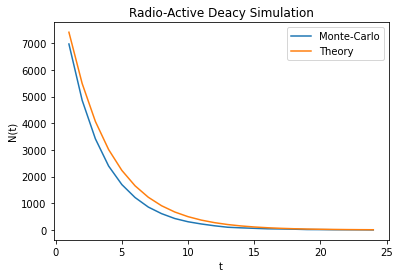

In [100]:
#constants
l = 0.3 #lambda is a keyword in python
N0 = 10000 #initial number of elemets
N = N0 #number of elements left is the intital number at start

ti = 0 
tf = 100
dt = 1


Ns = []
Ts = []


for t in range(int((tf-ti)/dt)):
    for n in range(1,N):
        r = random.random()
        if r <= l*dt:
            N -= 1
    t += dt
    
    Ns.append(N)
    Ts.append(t)
    
    if N ==1:
        break
    
# plt.plot(Ts,[math.log(i) for i in Ns])
plt.plot(Ts, Ns, label="Monte-Carlo")
plt.plot(Ts, [N0*math.exp(-l*t) for t in Ts], label='Theory')
plt.title("Radio-Active Deacy Simulation")
plt.ylabel("N(t)")
plt.xlabel("t")
plt.legend();

This graph nearly matches with the predictable theroy. But the thing is look we have ended the loop when number of elements are 1. Because this is exaponantial decay so expnantial function only goes to zero at infinity. So we can
t really have zero atoms left. 
This means that even we look after large time span there should be one atom left.

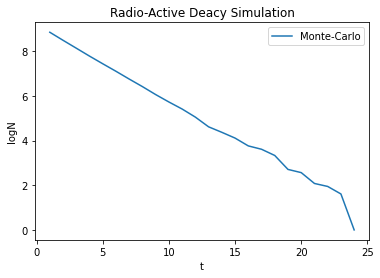

In [118]:
logN = [math.log(n) for n in Ns]
plt.plot(Ts, logN, label="Monte-Carlo")
plt.title("Radio-Active Deacy Simulation")
plt.ylabel("logN")
plt.xlabel("t")
plt.legend();

In [119]:
slope = (logN[20]-logN[0])/(Ns[20]-Ns[0])

In [120]:
slope*N0

9.726497093178883

Well this should be equal to the decay cofficient $\lambda$ bu it is not and I don't know why.